we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

# Import Packages

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
import torch.optim as optim

# Implementing Normalization on Dataset images

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

# After Normalization Prepared .. Downloading Training set

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [01:41<00:00, 1687176.95it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Loading Training Datasets

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Identify Classes of Our Dataset

In [6]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Checking our Training Image Sample

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

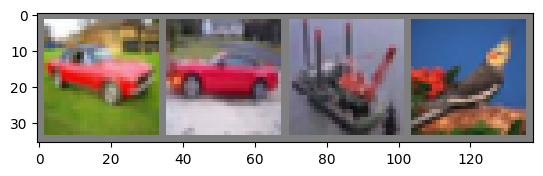

car   car   ship  bird 


In [9]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define a Convolutional Neural Network

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# Define a Loss function and optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network

In [14]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.208
[1,  4000] loss: 1.879
[1,  6000] loss: 1.687
[1,  8000] loss: 1.572
[1, 10000] loss: 1.521
[1, 12000] loss: 1.471
[2,  2000] loss: 1.413
[2,  4000] loss: 1.389
[2,  6000] loss: 1.369
[2,  8000] loss: 1.371
[2, 10000] loss: 1.343
[2, 12000] loss: 1.329
[3,  2000] loss: 1.245
[3,  4000] loss: 1.264
[3,  6000] loss: 1.259
[3,  8000] loss: 1.227
[3, 10000] loss: 1.216
[3, 12000] loss: 1.233
[4,  2000] loss: 1.136
[4,  4000] loss: 1.152
[4,  6000] loss: 1.163
[4,  8000] loss: 1.155
[4, 10000] loss: 1.154
[4, 12000] loss: 1.130
[5,  2000] loss: 1.069
[5,  4000] loss: 1.068
[5,  6000] loss: 1.072
[5,  8000] loss: 1.088
[5, 10000] loss: 1.078
[5, 12000] loss: 1.052
[6,  2000] loss: 0.995
[6,  4000] loss: 0.998
[6,  6000] loss: 1.015
[6,  8000] loss: 1.019
[6, 10000] loss: 1.034
[6, 12000] loss: 1.025
[7,  2000] loss: 0.942
[7,  4000] loss: 0.946
[7,  6000] loss: 0.976
[7,  8000] loss: 0.996
[7, 10000] loss: 0.980
[7, 12000] loss: 0.976
[8,  2000] loss: 0.885
[8,  4000] 

# Saving the trained model using torch

In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)